In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
img=cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

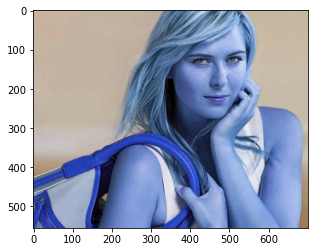

In [7]:
plt.imshow(img)

In [8]:
img

array([[[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [195, 181, 158],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [194, 180, 157],
        [193, 179, 156]],

       [[200, 179, 157],
        [200, 179, 157],
        [200, 179, 157],
        ...,
        [196, 182, 159],
        [195, 181, 158],
        [193, 179, 156]],

       ...,

       [[ 26,  58, 158],
        [ 30,  59, 163],
        [ 33,  59, 165],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 30,  62, 162],
        [ 32,  61, 165],
        [ 35,  61, 167],
        ...,
        [154, 120,  84],
        [154, 120,  84],
        [154, 120,  84]],

       [[ 35,  67, 167],
        [ 34,  63, 167],
        [ 36,  62, 168],
        ...,
        [153, 119,  83],
        [153, 119,  83],
        [153, 119,  83]]

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

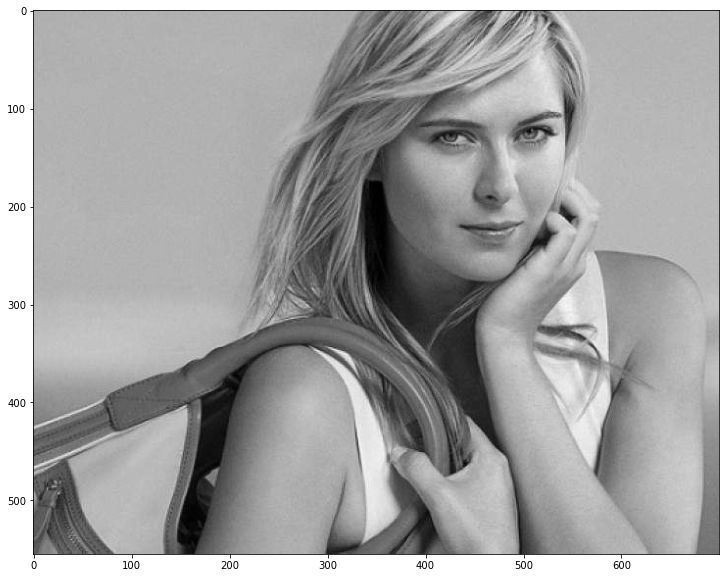

In [10]:
plt.rcParams["figure.figsize"] = (30,10)
plt.imshow(gray,cmap='gray')

In [11]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [12]:

face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [13]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

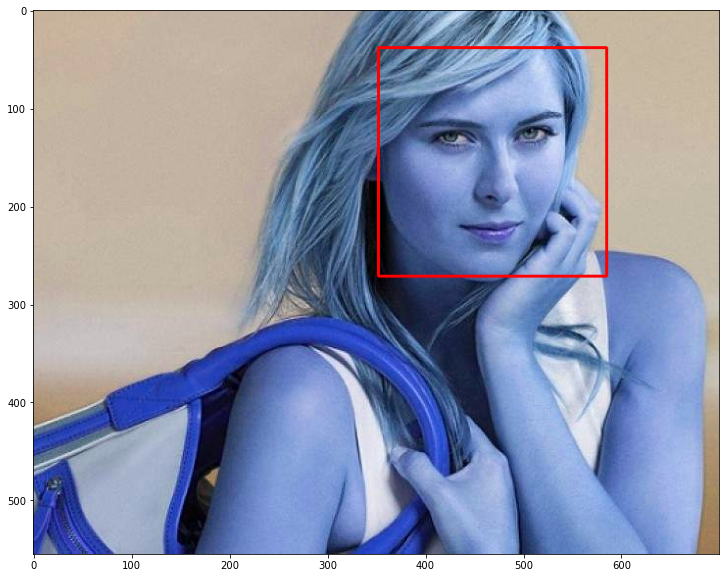

In [14]:
cv2.destroyAllWindows()
face_imgs=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_imgs)

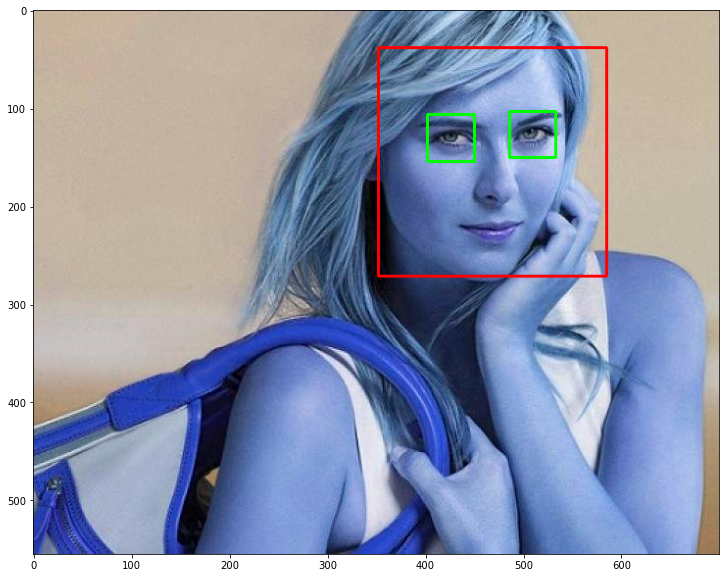

In [15]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
#     print(gray[y:y+h, x:x+w])
#     print(gray[y:y+h, x:x+w].shape)
#     print(face_img[y:y+h, x:x+w])
#     print(face_img[y:y+h, x:x+w].shape)
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

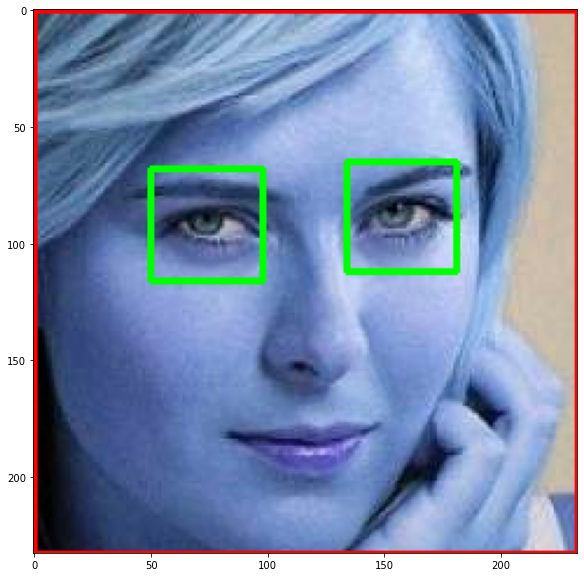

In [16]:
plt.imshow(roi_color,cmap='gray')

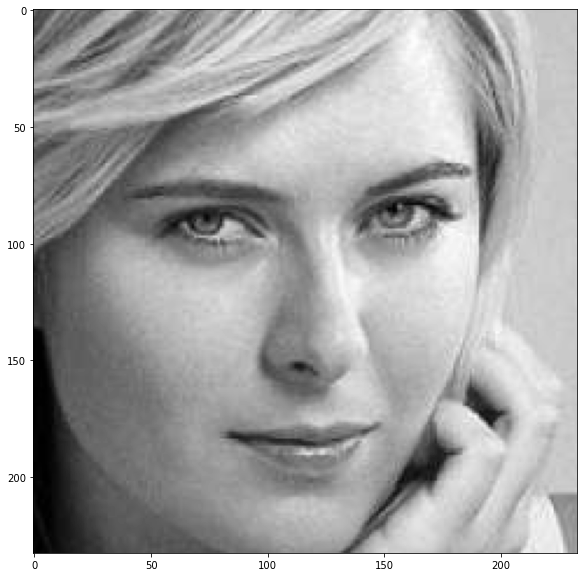

In [77]:
plt.imshow(roi_gray,cmap='gray')

In [29]:
# for face detection first we have to convert image into gray scale
# using cvtColor(img,cvt2.COLOR_BGR2GRAY) after this it will return us the array
# [[352,  38, 233, 233]]:[[x,y,w,h]] ->

# x:here first value tells us the region where on X-axis image starts 

# y: On where y axis the face is starting

# w: width of the face on X-axis, we can see on plot if image is starting from 352 on then 
# move 233 on X-axis or x+w so that we get face width on image 

# h: height of face simply imagine by y+h 

In [18]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [19]:
def get_cropped_image(path):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+h]
        roi_color=img[y:y+h,x:x+h]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [20]:
img=get_cropped_image('./test_images/sharapova1.jpg')
img
# plt.imshow(img)

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

In [21]:
path_of_data='./dataset/'
path_of_cr='./dataset/cropped/'

In [23]:
import os

img_dirs = []
for entry in os.scandir(path_of_data):
    if entry.is_dir():
        print(entry.path)
        img_dirs.append(entry.path)

./dataset/cropped
./dataset/lionel_messi
./dataset/maria_sharapova
./dataset/roger_federer
./dataset/serena_williams
./dataset/virat_kohli


In [24]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [25]:
img=cv2.imread('./dataset/serena_williams/09Hunter1-superJumbo.jpg')


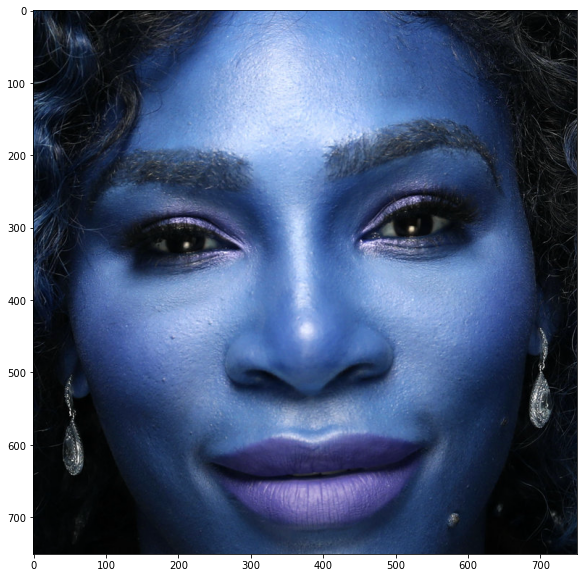

In [48]:
im=get_cropped_image('./dataset/serena_williams/09Hunter1-superJumbo.jpg')
plt.imshow(im)

In [32]:
# Make directoru for cropped images
import shutil
if os.path.exists(path_of_cr):
     shutil.rmtree(path_of_cr)
os.mkdir(path_of_cr)


In [33]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_of_cr + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [42]:
cropped_image_dirs

['./dataset/cropped/lionel_messi',
 './dataset/cropped/maria_sharapova',
 './dataset/cropped/roger_federer',
 './dataset/cropped/serena_williams',
 './dataset/cropped/virat_kohli']

In [43]:
# getting all files in a dictionary 

celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\\lionel_messi26.png',
  './dataset/cropped/lionel_messi\

In [44]:
# Mapping the names of people with numbers so that we can use these values for our classification


class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [85]:
import pywt


def w2d(img, mode='hear', level=1):
    imArray=img
    # Datatype conversion
    # Convert to grayscale
    imArray=cv2.cvtColor(imArray,cv2.COLOR_BGR2GRAY)
    
    # convert into float
    imArray=np.float32(imArray)
   
    imArray /=255
#     print(imArray)
    
    # compute coeffiecients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
#     print(coeffs)

    #process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *=0;
#     print(coeffs_H)

    # reconstruction

    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H *=255;
    imArray_H=np.uint8(imArray_H)
#     print(imArray_H)

    return imArray_H

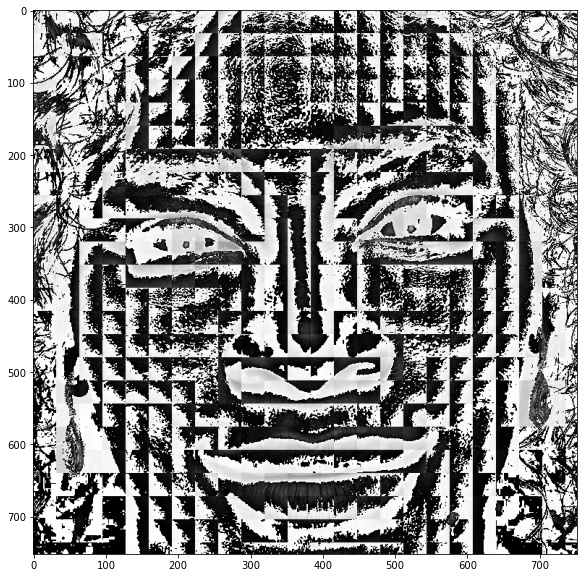

In [87]:
im_har=w2d(im,'db1',5)
plt.imshow(im_har,cmap='gray')

In [99]:
## We will use transform images with raw images to train model
## We stack these 2 images with each other

In [100]:
X, y = [], []

# Here we are using celebrity file_names to access the images

for celebrity_name, training_files in celebrity_file_names_dict.items():
    
    # read training_images then convert them in 32*32 pixels 
    # Apply wavetransformation 
    # Convert this image into 32 * 32 pixels and with numpy make a stack of thees 2 image
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
#         print(scalled_img_har)
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [101]:
len(X[0])

4096

In [102]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [238],
       [232],
       [230]], dtype=uint8)

In [94]:
y[0]

0

In [103]:


X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(169, 4096)

In [105]:
X[0]

array([100., 129., 140., ..., 238., 232., 230.])

## Training the model using SVM

In [104]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# converting those values using StandardScaler
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.813953488372093

In [108]:
len(y_train)

126

In [109]:

print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.73      0.80      0.76        10
           2       0.80      0.57      0.67         7
           3       0.75      0.86      0.80         7
           4       0.92      0.92      0.92        12

    accuracy                           0.81        43
   macro avg       0.81      0.80      0.80        43
weighted avg       0.82      0.81      0.81        43



## Try Different models using GridSearchCV

In [110]:

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV


In [111]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [112]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.842462,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.713846,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.849231,{'logisticregression__C': 1}


In [113]:
best_clf = best_estimators['svm']

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  0,  0],
       [ 0,  8,  1,  1,  0],
       [ 1,  1,  4,  1,  0],
       [ 0,  1,  0,  6,  0],
       [ 1,  1,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

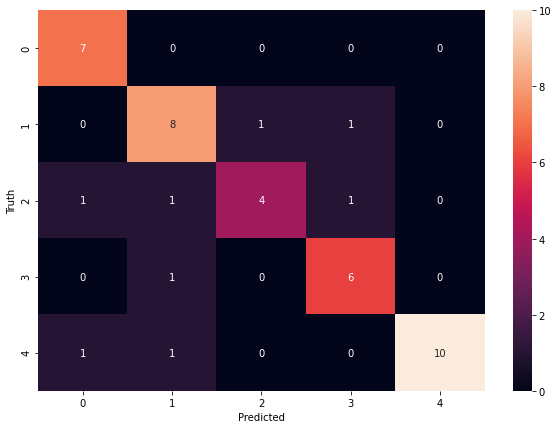

In [115]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [116]:
# Save the model

!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [119]:
# Convert file-names in json format

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))